## RandomForestRegressor

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\r1005\Downloads\Azure-ML-Deployment\data_Extraction_and_processing\Data\Real-Data\Real_Combine.csv')

In [4]:
# Show first 10 rows
df.head(10)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
5,16.0,25.2,10.0,1013.2,79.0,0.6,4.8,11.1,285.225000
6,13.4,21.0,9.2,1015.1,87.0,0.5,1.5,7.6,236.825000
7,14.3,22.6,6.6,1016.3,76.0,0.8,0.4,3.5,276.908333
8,12.7,18.9,7.3,1021.2,76.0,1.8,6.1,16.5,108.000000
9,11.9,18.9,6.3,1020.1,76.0,1.1,8.3,20.6,107.625000


In [5]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [6]:
df.shape

(1093, 9)

In [7]:
df = df.dropna(subset=["PM 2.5"])# since there is only one row missing wiht value i dropped it 

In [8]:
X = df.drop("PM 2.5", axis=1)
y = df["PM 2.5"]

In [9]:
## check null values
X.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [10]:
y.isnull().sum()

np.int64(0)

In [11]:
y.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

In [12]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


multivariate analysis


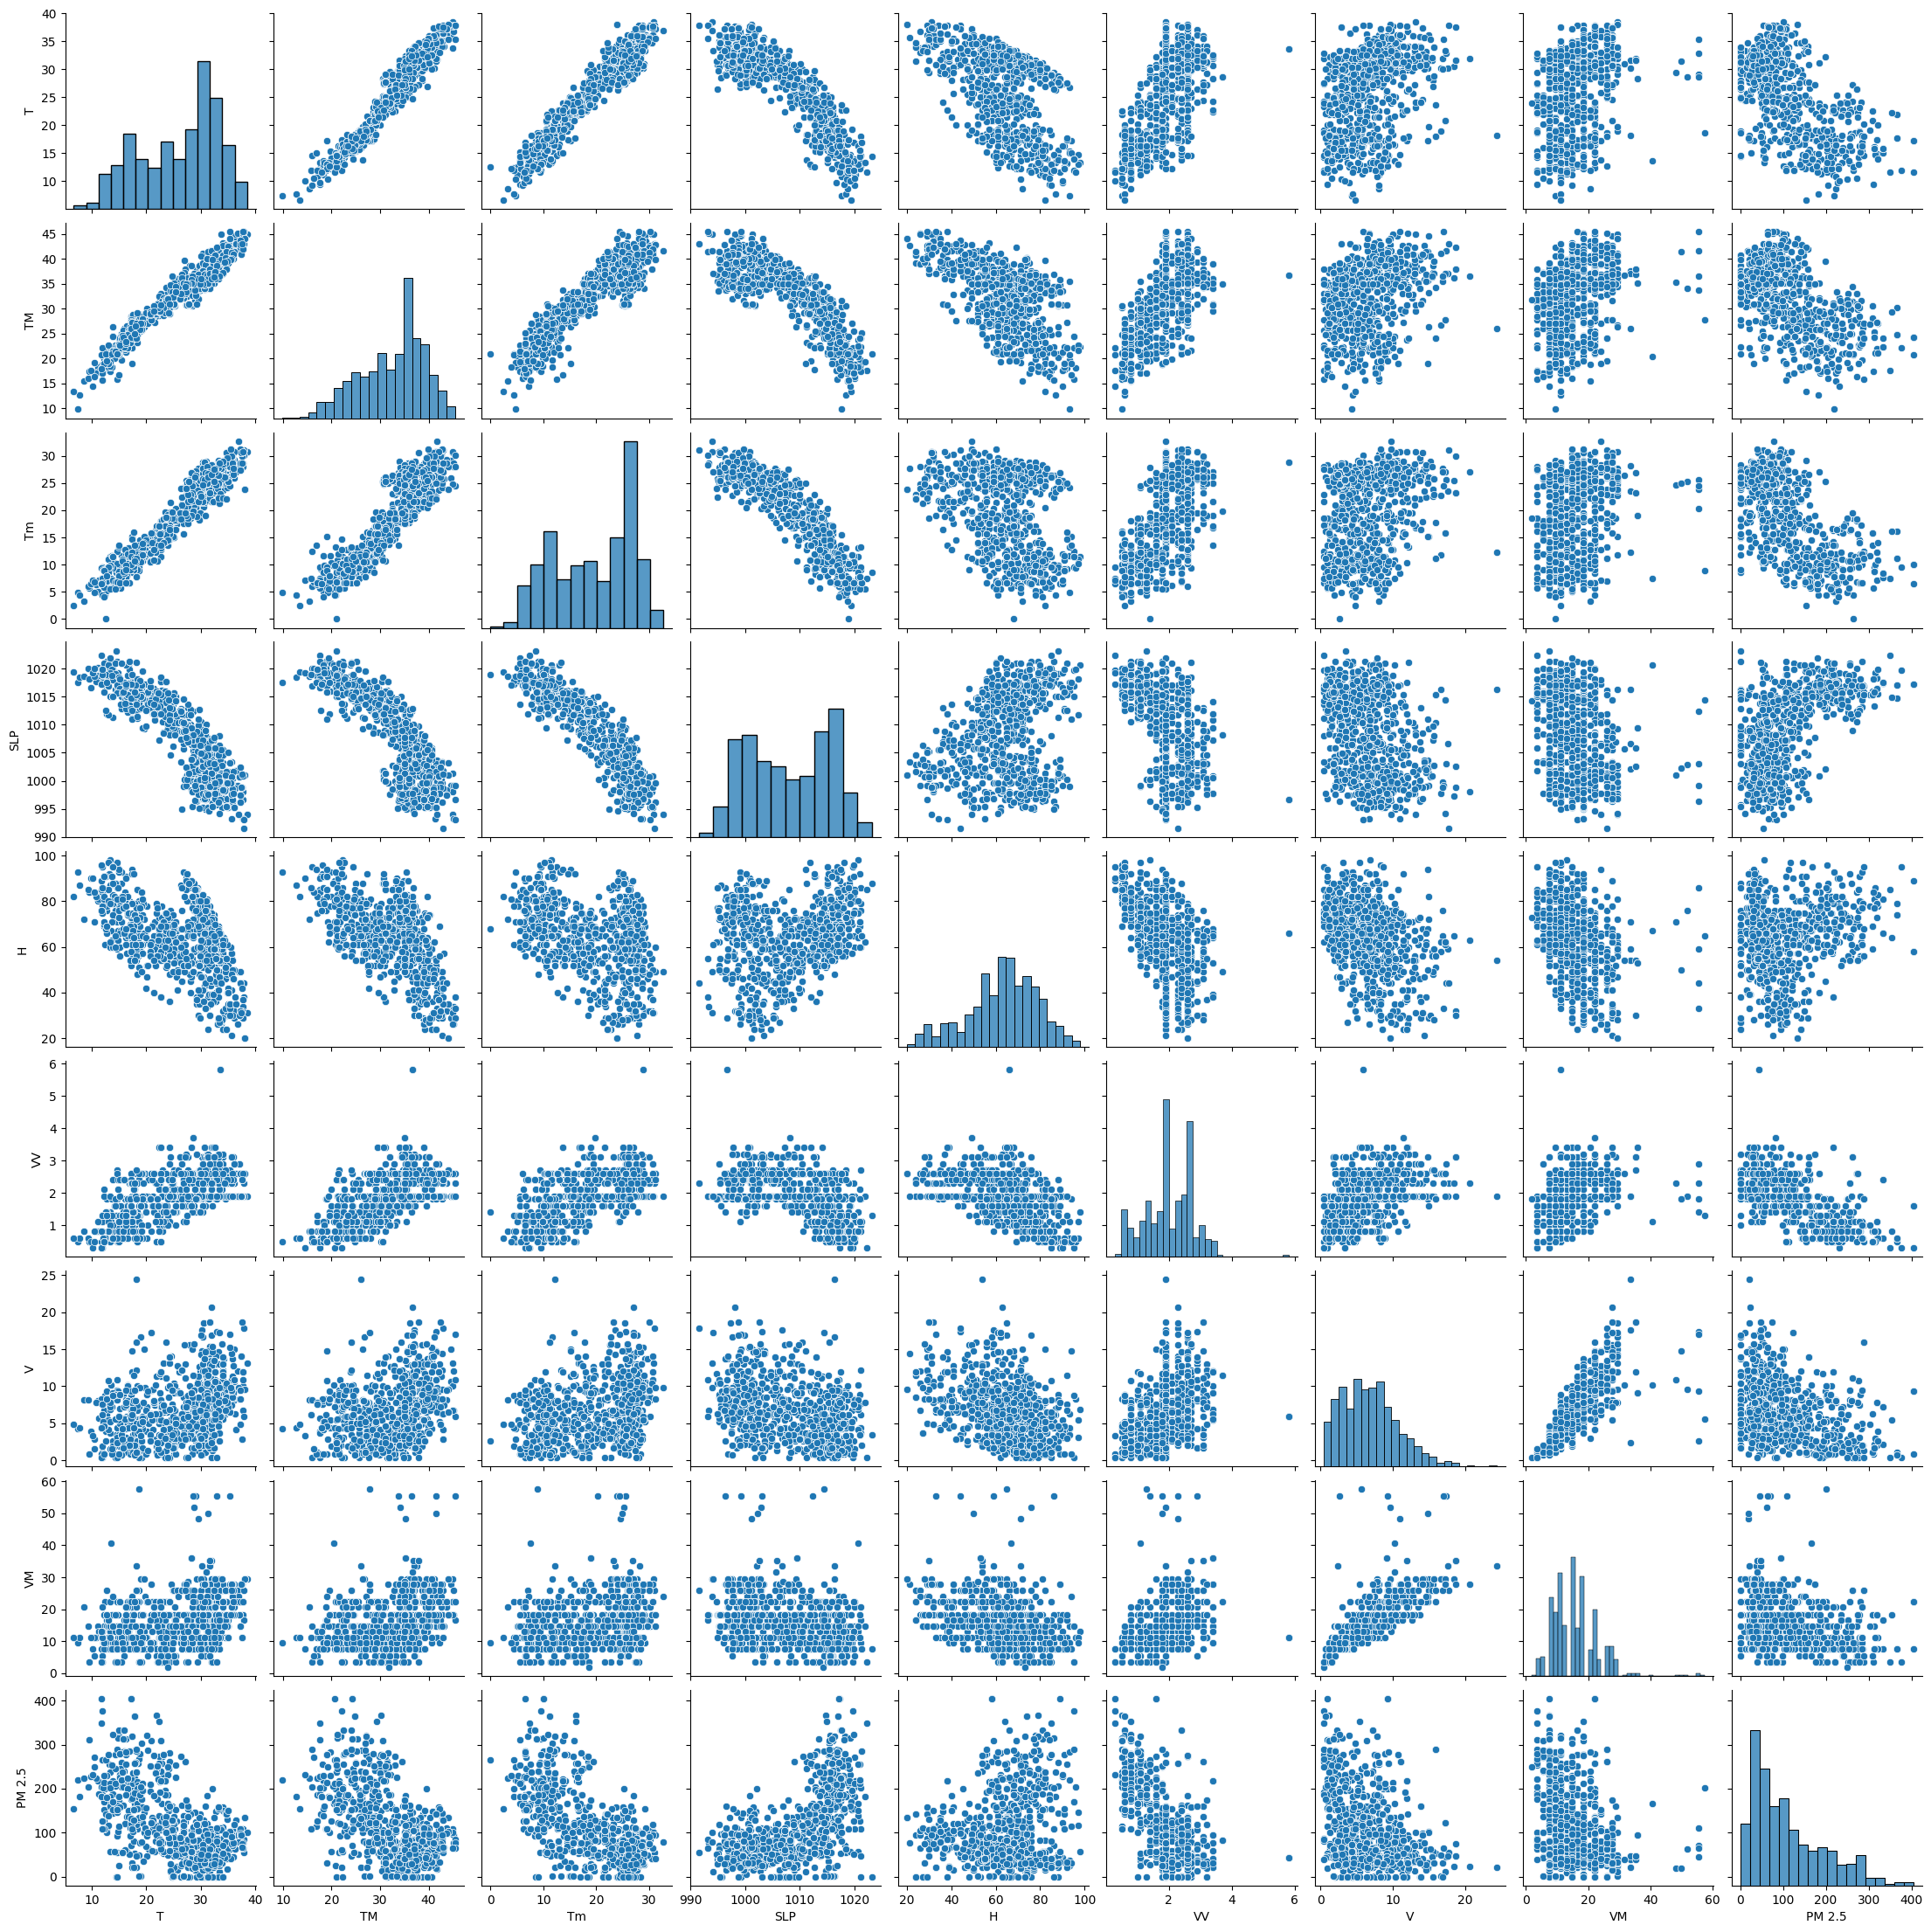

In [13]:
sns.pairplot(df)

In [7]:
df.corr()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967570,0.953703,-0.881698,-0.510593,0.640738,0.302349,0.288292,-0.631462
TM,0.967570,1.000000,0.891970,-0.823447,-0.588017,0.606746,0.293309,0.297590,-0.568409
Tm,0.953703,0.891970,1.000000,-0.917557,-0.288647,0.577382,0.296546,0.267249,-0.673824
SLP,-0.881698,-0.823447,-0.917557,1.000000,0.242307,-0.518015,-0.330155,-0.311231,0.623187
H,-0.510593,-0.588017,-0.288647,0.242307,1.000000,-0.465514,-0.380805,-0.362632,0.138005
VV,0.640738,0.606746,0.577382,-0.518015,-0.465514,1.000000,0.377029,0.342650,-0.573941
V,0.302349,0.293309,0.296546,-0.330155,-0.380805,0.377029,1.000000,0.775715,-0.268530
VM,0.288292,0.297590,0.267249,-0.311231,-0.362632,0.342650,0.775715,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


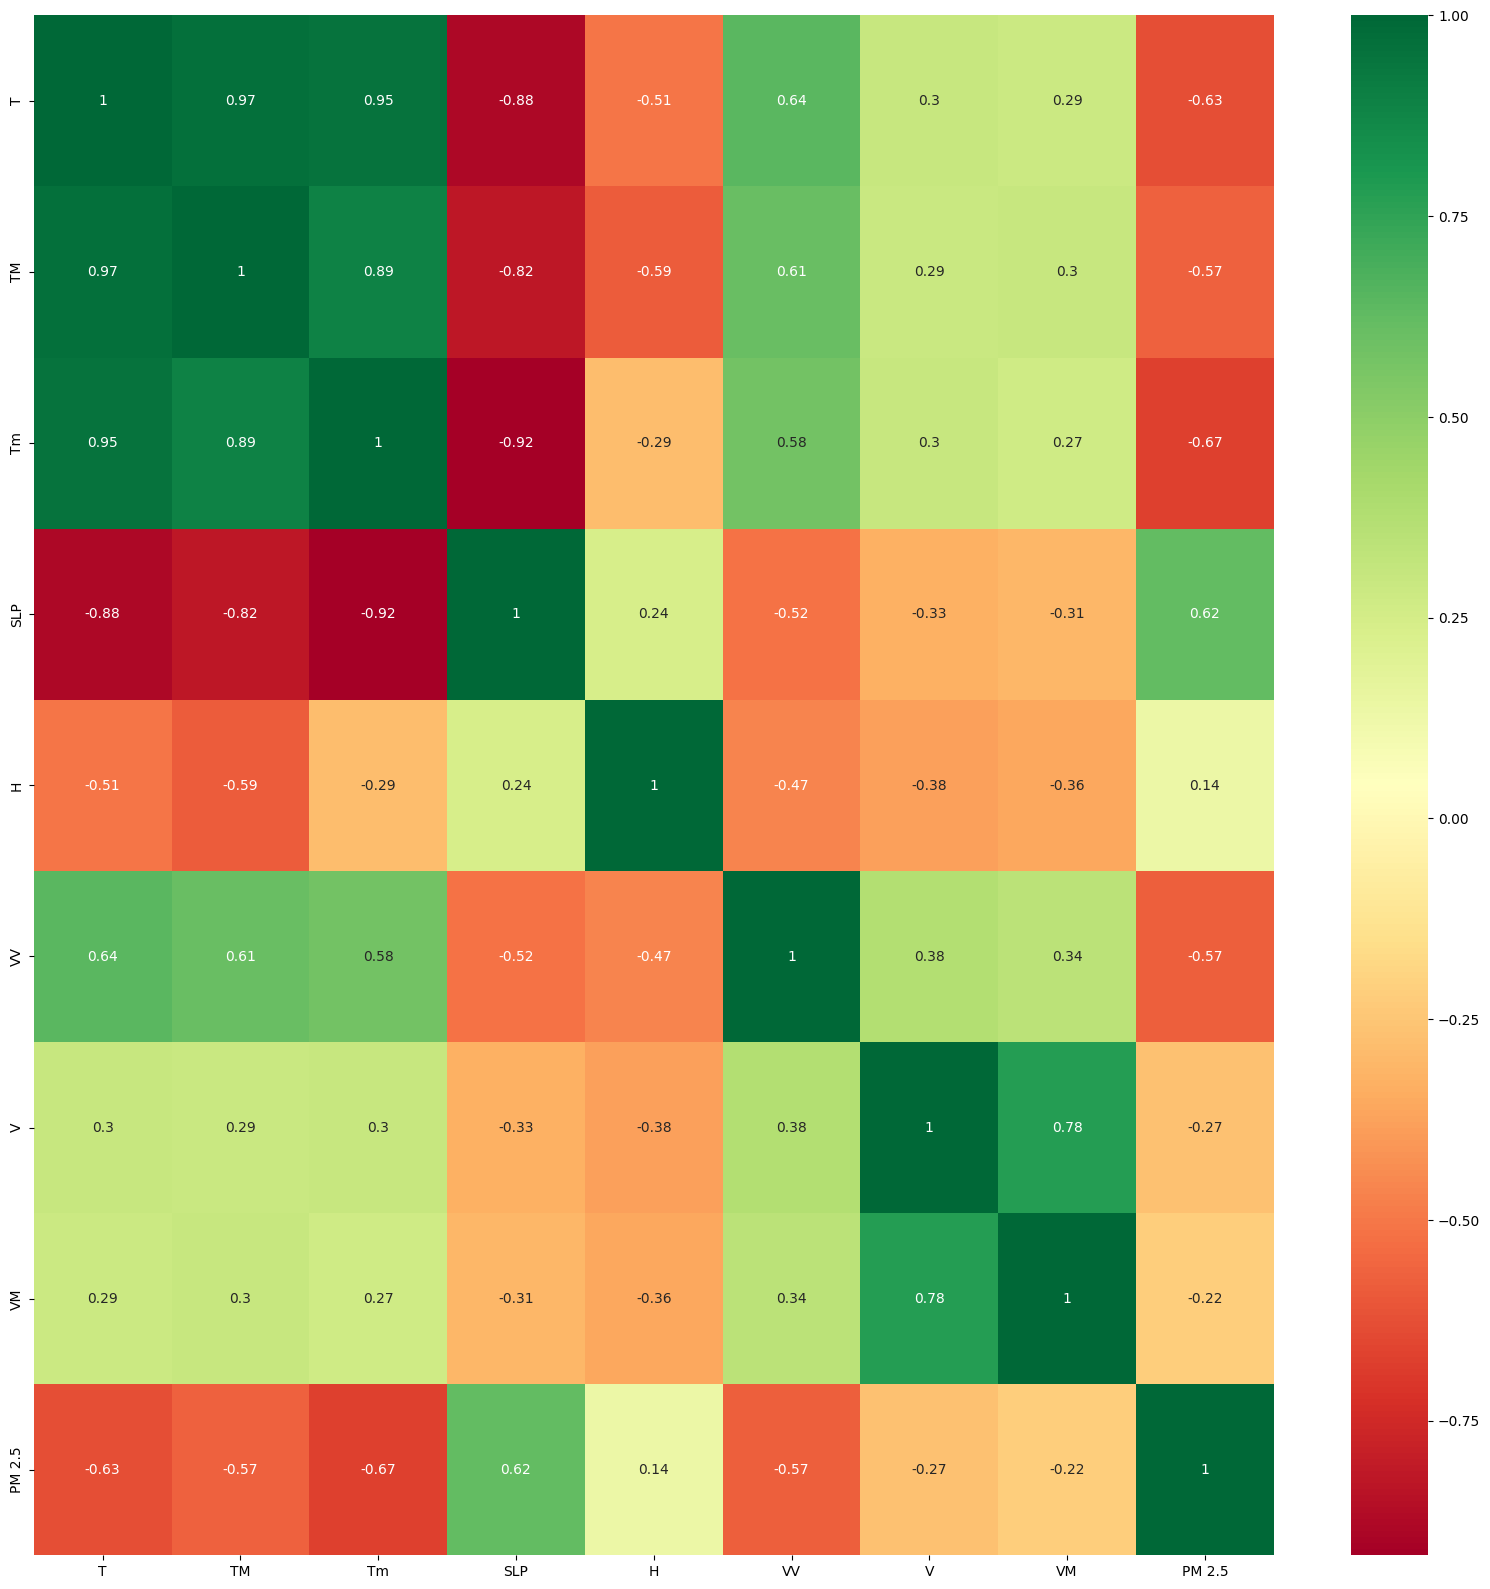

In [14]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20)) 
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

ML starts here 


In [15]:
from sklearn.model_selection import train_test_split

# Now you can use it
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Just to check that i did not break anything

In [16]:
print(X_train.head())

        T    TM    Tm     SLP     H   VV    V    VM
6    13.4  21.0   9.2  1015.1  87.0  0.5  1.5   7.6
978  35.1  39.2  25.3  1005.1  40.0  2.4  7.2  11.1
774  29.8  36.2  18.2  1012.7  52.0  2.4  3.3   7.6
854  27.3  33.3  24.0  1002.4  89.0  2.1  7.8  27.8
661  32.6  36.0  26.2   997.8  66.0  3.4  5.6   9.4


In [17]:
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

For Linear Regression (needs scaling)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

preprocessor_lr = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numeric_features),

    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]), categorical_features)
])

In [19]:

print(f"Features being processed: {numeric_features}")
if len(numeric_features) == 0:
    print("WARNING: You have no features selected!")

Features being processed: Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM'], dtype='object')


Tree model

In [20]:
preprocessor_tree = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median"))
    ]), numeric_features),

    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]), categorical_features)
])

In [21]:
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
pipe_lr = Pipeline([
    ("preprocessor", preprocessor_lr),
    ("model", LinearRegression())
])

pipe_dt = Pipeline([
    ("preprocessor", preprocessor_tree),
    ("model", DecisionTreeRegressor(random_state=42))
])

pipe_rf = Pipeline([
    ("preprocessor", preprocessor_tree),
    ("model", RandomForestRegressor(random_state=42))
])

hyperparameter tuning


In [23]:
param_lr = {}

param_dt = {
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_split": [2, 5, 10]
}

param_rf = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5]
}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
models = {
    "LinearRegression": (pipe_lr, param_lr),
    "DecisionTree": (pipe_dt, param_dt),
    "RandomForest": (pipe_rf, param_rf)
}

results = {}

for name, (pipe, params) in models.items():
    grid = GridSearchCV(
        pipe,
        params,
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    results[name] = grid
    
    print(f"{name} Best CV Score: {grid.best_score_}")

LinearRegression Best CV Score: -58.42176808075228
DecisionTree Best CV Score: -46.587310464628864
RandomForest Best CV Score: -35.1001115788673


In [27]:
for name, model in results.items():
    print(name, model.best_score_)

LinearRegression -58.42176808075228
DecisionTree -46.587310464628864
RandomForest -35.1001115788673


In [28]:
best_model_name = max(results, key=lambda x: results[x].best_score_)
best_model = results[best_model_name].best_estimator_

print("Best Model:", best_model_name)

Best Model: RandomForest


In [ ]:
print("NaN in y_test:", y_test.isna().sum()) #predvious had a prblem with ytest showing null value all the way through the end
print("NaN in y_pred:", np.isnan(y_pred).sum())

NaN in y_test: 0


NameError: name 'y_pred' is not defined

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R²:", r2)

Test RMSE: 38.058609119101654
Test R²: 0.7687301382735707


In [31]:
# open a file, where you ant to store the data
#file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
#pickle.dump(rf_random, file)